# Evaluation of the long term dynamics of the model.

Data from runs over 3000 years for different possible income from trade.

Single trajectories are also evaluated, since the aggregate data does not give insight into the actual model behavior.

**NOTE:** These runs are done without climate variability. The variation is only caused by interplay of social and ecological dynamics in the system.

Populating the interactive namespace from numpy and matplotlib
Index(['time', 'total_population', 'max settlement population',
       'total_migrants', 'total_settlements', 'total_agriculture_cells',
       'total_cells_in_influence', 'total_trade_links', 'mean_cluster_size',
       'max_cluster_size', 'new settlements', 'killed settlements',
       'built trade links', 'lost trade links', 'total_income_agriculture',
       'total_income_ecosystem', 'total_income_trade', 'mean_soil_degradation',
       'forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells',
       'es_income_forest', 'es_income_waterflow',
       'es_income_agricultural_productivity', 'es_income_precipitation',
       'es_income_pop_density', 'MAP', 'max_npp', 'mean_waterflow', 'max_AG',
       'max_ES', 'max_bca', 'max_soil_deg', 'max_pop_grad'],
      dtype='object')


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


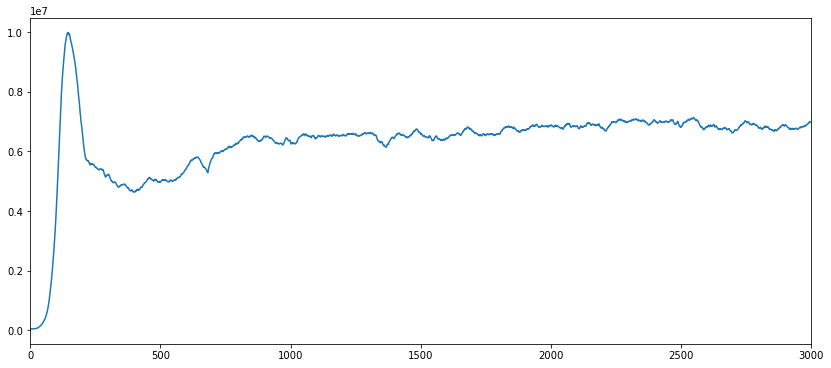

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

d_start = 150
d_length = 20

testing = False
trj = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/X8_longterm_dynamics/results/7000-_s0.pkl')['trajectory']
print(trj.columns)
trj['total_population'].plot()

(432, 400)


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


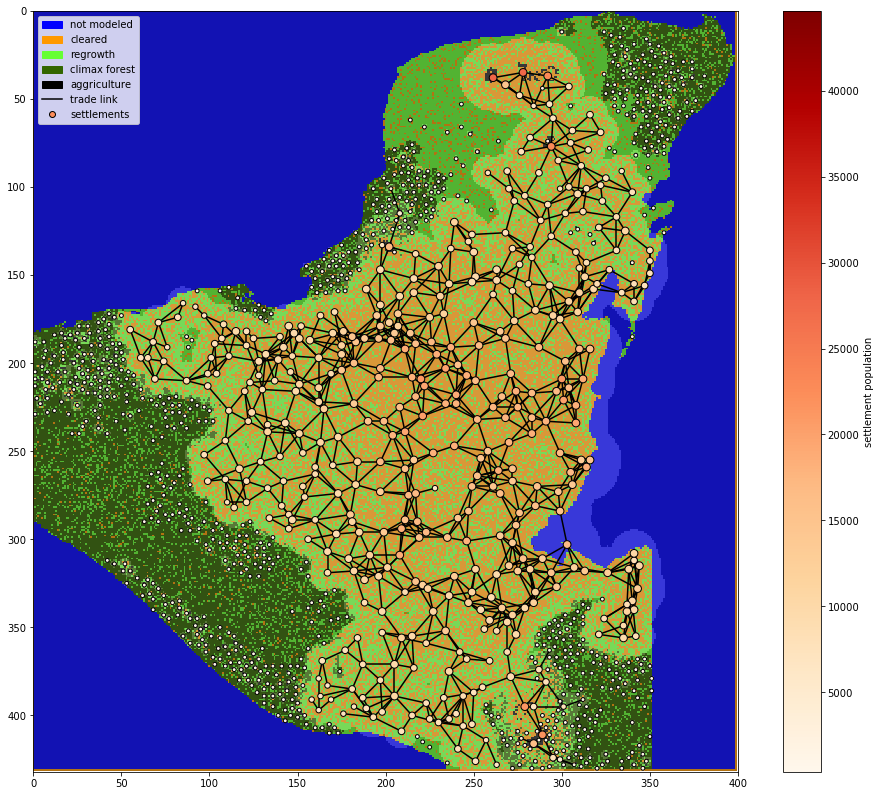

In [38]:
pylab.rcParams['figure.figsize'] = (14, 14)

import matplotlib.patches as mpatches

forest_colors = ['blue', '#FF9900', '#66FF33', '#336600', 'black']

fig = plt.figure(figsize=(16, 14))

t = 600
ax = fig.add_subplot(1,1,1)
location = '/home/jakob/Project_MayaSim/Python/output_data/X8_longterm_dynamics/results/geographic_data_{0:03d}.pkl'.format(t)

data = np.load(location)

forest = data['forest']

# plot forest state

shape = forest.shape
print(shape)

cropped = np.zeros(shape)
influenced = np.zeros(shape)

cropped_cells = data['cropped cells']
influenced_cells = data['cells in influence']

for city in range(len(data['x positions'])):
    if len(cropped_cells[city]) > 0:
        influenced[influenced_cells[city][0], influenced_cells[city][1]] = 1
        cropped[cropped_cells[city][0], cropped_cells[city][1]] = 1

forest[cropped == 1] = 4

cmap1 = ListedColormap(forest_colors)
norm = Normalize(vmin=0, vmax=4)
im1 = ax.imshow(forest, 
                 cmap=cmap1, 
                 norm=norm, 
                 interpolation='none',
                 alpha=0.9,
                 zorder=0)

cmap2 = ListedColormap([(0,0,0), 'grey'])
im2 = ax.imshow(influenced,
                 cmap=cmap2,
                 alpha=0.3,
                 zorder=0)

# plot trade network from adjacency matrix and settlement positions

for i, xi in enumerate(zip(data['y positions'], data['x positions'])):
    for j, xj in enumerate(zip(data['y positions'], data['x positions'])):
        if data['adjacency'][i, j] == 1:
            ln = plt.plot([xi[0], xj[0]], [xi[1], xj[1]], color='black', zorder=1, label='trade network')

# plot settlements with population as color and rank as size

max_population = trj['max settlement population'].max()

cmap = plt.get_cmap('OrRd')
sct = plt.scatter(data['y positions'],
                  data['x positions'],
                  [15 * (x+1) for x in data['rank']], 
                  c=data['population'], 
                  cmap=cmap,
                  edgecolors='black',
                  zorder=2,
                  vmax = max_population,
                  label='settlements')

patches = []
for color in forest_colors:
    patches.append(mpatches.Patch(color=color))
patches += ln

circ1 = plt.Line2D(range(3), range(3), marker='o', color=(0,0,0,0), markeredgecolor='black', markerfacecolor=cmap(0.5))

patches.append(circ1)
    
labels= ['not modeled', 'cleared', 'regrowth', 'climax forest', 'aggriculture', 'trade link', 'settlements']
        
plt.legend(patches, labels)

fig.colorbar(sct, label='settlement population', shrink=1)
ax.set_ylim([shape[0], 0])
ax.set_xlim([0, shape[1]])
fig.show()
fig.savefig('frame_{0:03d}'.format(t), dpi=200, transparent=True)
fig.clear()



